# Time Series Forecasting using LSTM

In the challenge, We have given Sales from day1 to day1913 and we have to predict sales from day14 to day1941( next 28 days sales)

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Import dataset
train_df=pd.read_csv('../input/m5-forecasting-accuracy/sales_train_validation.csv')

## Reduce memory size

In [ ]:
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

### Before Downcasting

In [ ]:
train_df.info()

In [ ]:
train_df=downcast_dtypes(train_df)

### After Downcasting 

In [ ]:
train_df.info()

## Dataset Creation

In [ ]:
train_df

### Take Transpose of dataset

In [ ]:
train_df = train_df.T

In [ ]:
train_df = train_df[6:] # because we need only sales 

In [ ]:
train_df

### data scaling

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
train_df = sc.fit_transform(train_df)

### Generating X_train , Y_train

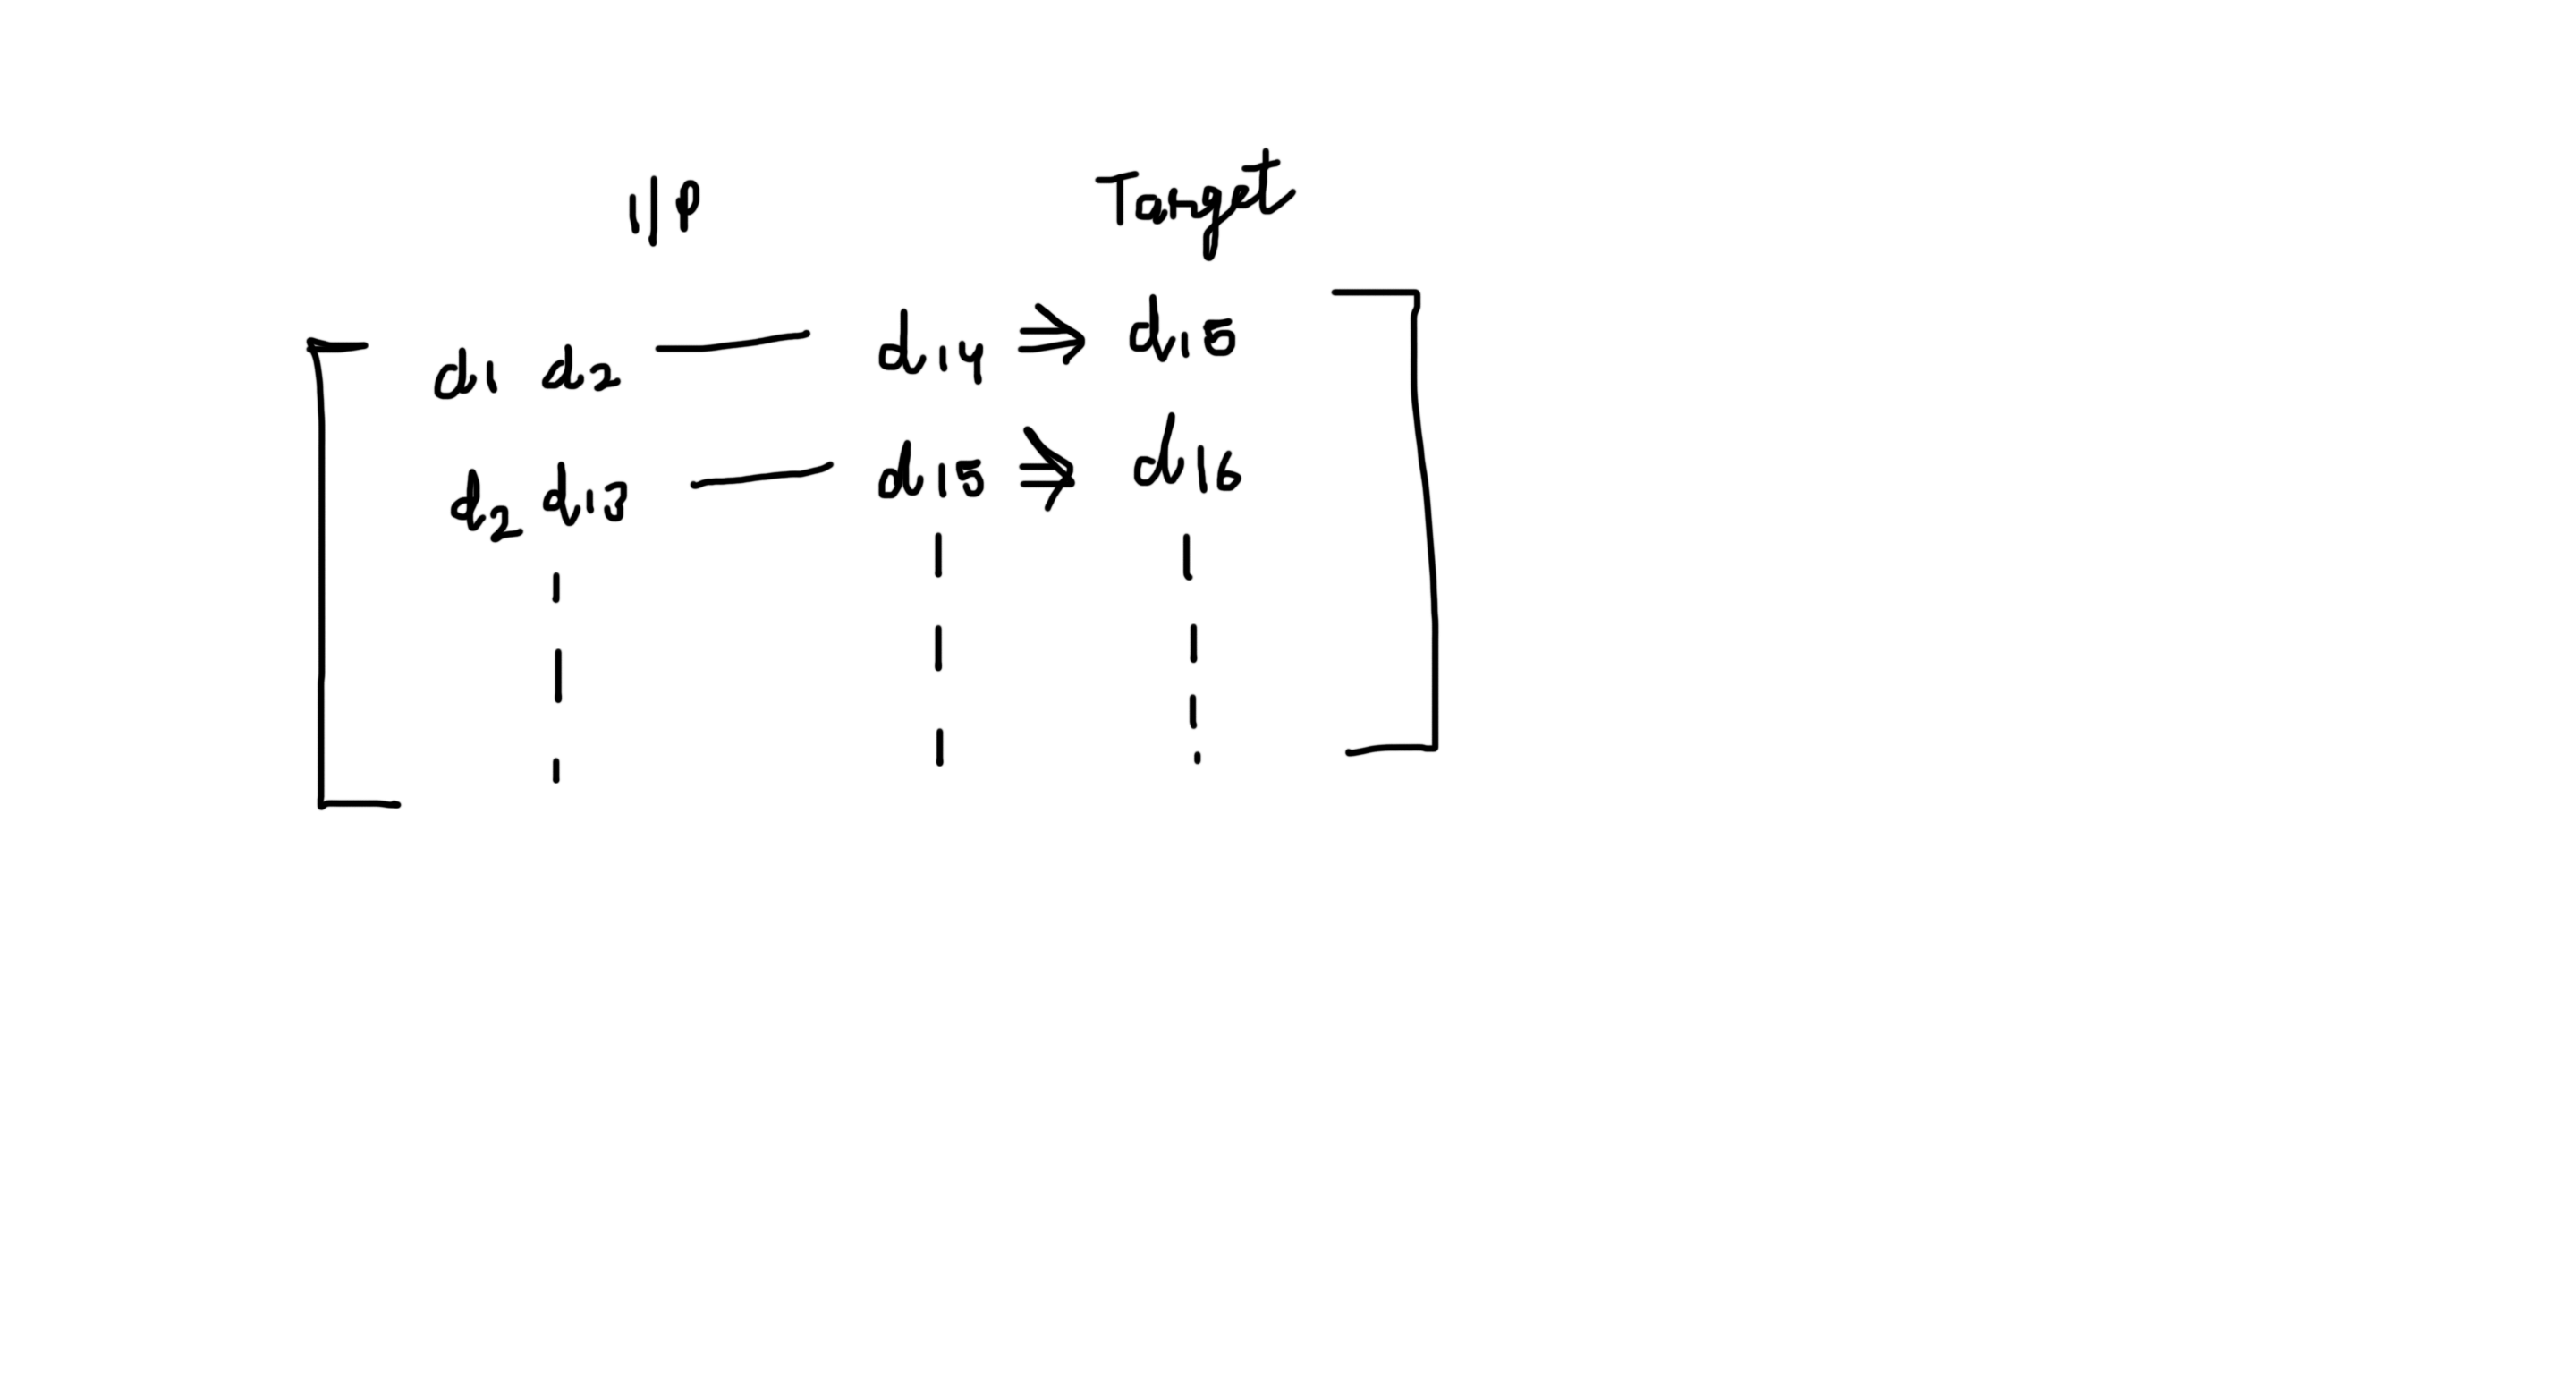

In [ ]:
timesteps=14
X_train = []
y_train = []
for i in range(timesteps, 1913):
    X_train.append(train_df[i-timesteps:i])
    y_train.append(train_df[i][0:30490]) 

In [ ]:
X_train = np.array(X_train, dtype = 'float16')
y_train = np.array(y_train, dtype = 'float16')

In [ ]:
X_train.shape,y_train.shape

## Model Creation 

I am using Tensorflow LSTM model. The Model has one LSTM layer and one dense layer. If you wanted to know about LSTM you can refer to  this blog http://colah.github.io/posts/2015-08-Understanding-LSTMs/ 

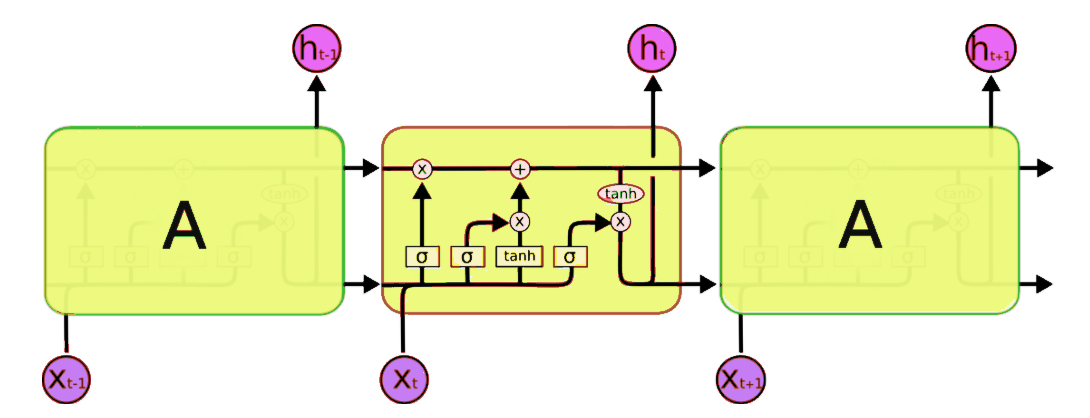

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units =64,input_shape = (np.array(X_train).shape[1], np.array(X_train).shape[2])))
model.add(tf.keras.layers.Dense(30490))

model.compile(
  loss='mean_squared_error',
  optimizer=tf.keras.optimizers.Adam(0.001)
)
model.summary()

In [ ]:
model.fit(X_train, y_train, epochs = 10, batch_size = 10)

## Test Data

In [ ]:
inputs= train_df[-timesteps:]
inputs = sc.transform(inputs)

In [ ]:
inputs

In [ ]:
X_test=[]
X_test.append(inputs[0:timesteps])
X_test = np.array(X_test)

In [ ]:
predictions=model.predict(X_test)

In [ ]:
predictions